In [1]:
arr1 = [2, 5, 1, 2, 7, 2, 3, 9, 10, 99, 1, 3, 5]
arr2 = [1, 1, 2, 3, 8, 9, 10, 11, 14, 15, 15, 15, 18]

## Sequential Search

**Best Case Scenario**: Omega(1)

**Worst Case Scenario**: O(n)

**Average Case Scenario**: Theta(n) >>> (3/4n + 1/4) comparisons for equal probability of successful and unsuccessful search

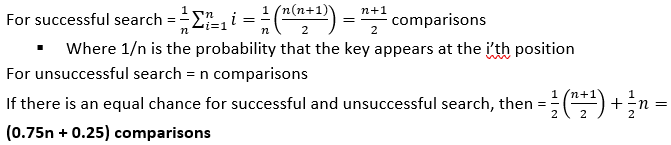

In [2]:
def sequential_search(arr, key):
    for i in range(len(arr)):
        if arr[i] == key:
            return True
    return False

In [3]:
# Unsuccessful search
sequential_search(arr1, 20)

False

In [4]:
# Successful search
sequential_search(arr1, 99)

True

## Binary Search

**Best Case Scenario**: Omega(1)

**Worst Case Scenario**: O(lg(n))

**Average Case Scenario**: Theta(lg(n))

Description: Look at the middle element. If it is the key, yay! If key < middle element, look at the left partition. If key > middle element, look at the right partition.

In [5]:
def binary_search(arr, key):
    first_pos = 0
    last_pos = len(arr) - 1
    found = False
    
    while first_pos <= last_pos and not found:
        mid_pos = (first_pos + last_pos) // 2
        if arr[mid_pos] == key:
            found = True
        elif key < arr[mid_pos]:
            last_pos = mid_pos - 1
        elif key > arr[mid_pos]:
            first_pos = mid_pos + 1
        
    return found

In [6]:
# Unsuccessful search
binary_search(arr2, 20)

False

In [7]:
# Succesful search
binary_search(arr2, 2)

True

In [8]:
def recursive_binary_search(arr, first_pos, last_pos, key):
    # Unsuccessful search
    if last_pos < first_pos:
        return False
    else:
        mid_pos = (first_pos + last_pos) // 2
        if key == arr[mid_pos]:
            return True
        elif key < arr[mid_pos]:
            return recursive_binary_search(arr, first_pos, mid_pos-1, key)
        elif key > arr[mid_pos]:
            return recursive_binary_search(arr, mid_pos+1, last_pos, key)
        
first_pos = 0
last_pos = len(arr2) - 1

In [9]:
# Unsuccessful search
recursive_binary_search(arr2, first_pos, last_pos, 20)

False

In [10]:
# Successful search
recursive_binary_search(arr2, first_pos, last_pos, 2)

True

# Hashing Algorithms

## Closed Address Hashing

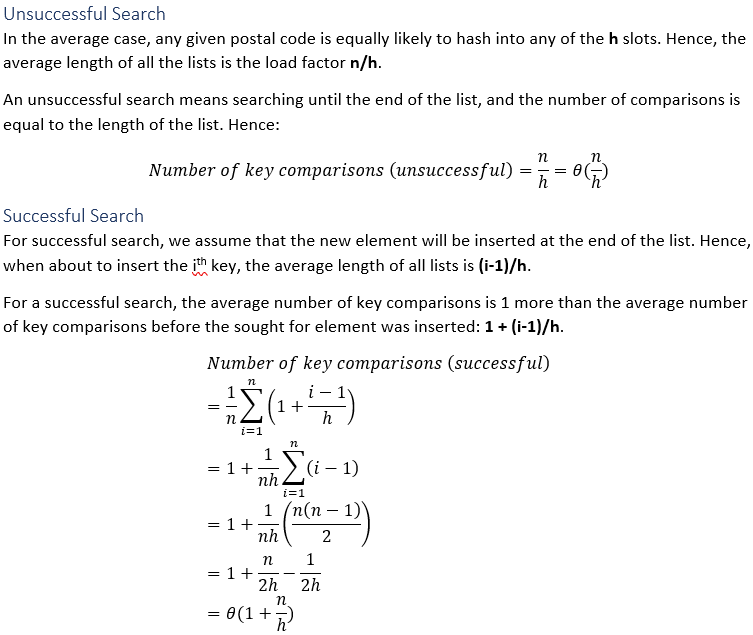

In [11]:
# arr2 = [1, 1, 2, 3, 8, 9, 10, 11, 14, 15, 15, 15, 18]

def hash_function(key, slot_num):
    return key % slot_num

def closed_address_hashing(arr):
    hash_table = []
    slot_num = 3
    
    for i in range(slot_num):
        hash_table.append([])
    
    for key in arr:
        slot = hash_function(key, slot_num)
        hash_table[slot].append(key)
    
    return hash_table

In [12]:
closed_address_hashing(arr2)

[[3, 9, 15, 15, 15, 18], [1, 1, 10], [2, 8, 11, 14]]

## Open Address Hashing (Linear Probing)

In [13]:
# arr2 = [1, 1, 2, 3, 8, 9, 10, 11, 14, 15, 15, 15, 18]

slot_num = 20

def hash_function(key):
    return key % slot_num

def lp_rehash(slot):
    return (slot + 1) % slot_num

def linear_probing(arr):
    hash_table = []
    
    for i in range(slot_num):
        hash_table.append(None)
    
    for key in arr:
        slot = hash_function(key)
        hashed = False
        
        while not hashed:
            if hash_table[slot]:
                slot = lp_rehash(slot)
            else:
                hash_table[slot] = key
                hashed = True
    
    return hash_table

In [14]:
print(linear_probing(arr2))

[None, 1, 1, 2, 3, None, None, None, 8, 9, 10, 11, None, None, 14, 15, 15, 15, 18, None]


## Open Address Hashing (Double Hashing)

In [15]:
arr2 = [1, 1, 2, 3, 8, 9, 10, 11, 14, 15, 15, 15, 18]

slot_num = 20

def hash_function(key):
    return key % slot_num

def hash_function_2(key):
    return key % 7 + 1

def double_hashing(arr):
    hash_table = []
    
    for i in range(slot_num):
        hash_table.append(None)
    
    for key in arr:
        slot = hash_function(key)
        hashed = False
        multiplier = 1
        
        while not hashed:
            if hash_table[slot]:
                res = hash_function_2(key)
                slot = (slot + multiplier*res) % slot_num
                multiplier += 1
            else:
                hash_table[slot] = key
                hashed = True
        
        slot = hash_function(key)
        hash_table[slot] = key
    
    return hash_table

In [16]:
print(double_hashing(arr2))

[None, 1, 2, 3, None, 15, None, 3, 8, 9, 10, 11, None, None, 14, 15, None, 15, 18, None]


# Sorting Algorithms

## Insertion Sort

Repeatedly pick an element X to insert into a sorted subarray on the left side by comparing X with its left neighbor. If they are out of order, swap them. Else, insert X there.

### Time Complexity
- Outer loop always has n-1 iterations
- __Best case scenario__: Already sorted
    - 1 key comparison per n-1 iterations
    - n-1 = **O(n)**
- __Worst case scenario__: Reversely sorted
    - i key comparisons per i'th iteration for n-1 iterations
    - sum(1 to n-1) = n/2(n-1) = **O(n^2)**
- __Average case__
    - Average no. of comparisons in the inner loop for the i'th iteration = 1/i * sum(1 to i) = (i+1)/2
    - Average no. of comparisons for n-1 iterations = sum(1 to n-1 for (i+1)/2) = (n-1)(n+2)/4 = **O(n^2)**
    
### Strengths
- Almost sorted list
- To verify if list is sorted

### Weaknesses
- When element inserted, it may not be in its final position
- If each slot contains a lot of data, movement is expensive

In [17]:
arr1 = [2, 5, 1, 2, 7, 2, 3, 9, 10, 99, 1, 3, 5]

def insertion_sort(arr):
    # Look at all the elements in the array
    for i in range(1, len(arr)):
        # Find the correct place to insert the item (check from the back)
        for j in range(i, 0, -1):
            if arr[j] < arr[j-1]:
                arr[j], arr[j-1] = arr[j-1], arr[j]
            else:
                break
#         print(arr)
    return arr
                
print(insertion_sort(arr1))

[1, 1, 2, 2, 2, 3, 3, 5, 5, 7, 9, 10, 99]


## Merge Sort

In [18]:
def merge_sort(arr, n, m):
    if m > n:
        mid = (n + m) // 2
        merge_sort(arr, n, mid)
        merge_sort(arr, mid+1, m)
        merge(arr, n, m)

def merge(arr, n, m):
    if m <= n:
        return
    
    mid = (n + m) // 2
    a = n
    b = mid + 1
    
    # While neither the right nor left arrays have finished iterating
    while a <= mid and b <= m:
        # Left > Right
        if arr[a] > arr[b]:
            temp = arr[b]
            b += 1 # Increase the right subarray's pointer
            # Shift the left array up
            mid += 1
            for i in range(mid, a, -1):
                arr[i] = arr[i-1]
            arr[a] = temp
            a += 1
                
        # Left < Right
        # The element is already where it is supposed to be
        elif arr[a] < arr[b]:
            a += 1
            
        # Left == Right
        else:
            temp = arr[b]
            b += 1
            a += 1
            mid += 1
            for i in range(mid, a, -1):
                arr[i] = arr[i-1]
            arr[a] = temp
            a += 1
            
arr1 = [2, 4, 5, 1, 3, 4]
merge_sort(arr1, 0, len(arr1)-1)
print(arr1)

[1, 2, 3, 4, 4, 5]


## Quick Sort

In [19]:
# def quick_sort(min_pos, max_pos):
#     if min_pos < max_pos:
#         pivot_pos = partition(min_pos, max_pos)
#         quick_sort(min_pos, pivot_pos - 1)
#         quick_sort(pivot_pos + 1, max_pos)

def quick_sort(arr, min_pos, max_pos):
    if min_pos < max_pos:
        pivot_pos = partition(arr, min_pos, max_pos)
        quick_sort(arr, min_pos, pivot_pos - 1)
        quick_sort(arr, pivot_pos + 1, max_pos)

def partition(arr, min_pos, max_pos):
    
    # Take the middle element as the pivot
    mid_pos = (min_pos+max_pos)//2
    pivot_val = arr[mid_pos]
    print("Pivot: " + str(pivot_val) + " at position " + str(mid_pos))
    print(arr)
    
    # Swap the pivot to become the first element
    arr[min_pos], arr[mid_pos] = arr[mid_pos], arr[min_pos]
    
    # Case 1: The chosen pivot is the smallest value -> Yes, pivot_pos should be 0
    pivot_pos = min_pos
    
    # Compare the pivot value with the rest of the elements (at position min_pos+1 and above)
    for i in range(min_pos + 1, max_pos + 1):
        
        # Found an element smaller than the pivot value
        if arr[i] < pivot_val:
            pivot_pos += 1
            # We are moving all the small elements to the left partition (while not touching the pivot value)
            # While determining where the pivot element should be at the end.
            arr[pivot_pos], arr[i] = arr[i], arr[pivot_pos]
            
    # Put the pivot back
    arr[min_pos], arr[pivot_pos] = arr[pivot_pos], arr[min_pos]
    return pivot_pos
    
arr = [-2, 12, 4, 1, 5, 2, 4, 9, 10, 2, 99, 4, 5, 3, 1, 0, -1]
quick_sort(arr, 0, len(arr)-1)

Pivot: 10 at position 8
[-2, 12, 4, 1, 5, 2, 4, 9, 10, 2, 99, 4, 5, 3, 1, 0, -1]
Pivot: 9 at position 6
[-1, 4, 1, 5, 2, 4, 9, -2, 2, 4, 5, 3, 1, 0, 10, 12, 99]
Pivot: -1 at position 6
[0, 4, 1, 5, 2, 4, -1, -2, 2, 4, 5, 3, 1, 9, 10, 12, 99]
Pivot: 4 at position 7
[-2, -1, 1, 5, 2, 4, 0, 4, 2, 4, 5, 3, 1, 9, 10, 12, 99]
Pivot: 0 at position 4
[-2, -1, 1, 2, 0, 1, 2, 3, 4, 4, 5, 4, 5, 9, 10, 12, 99]
Pivot: 1 at position 5
[-2, -1, 0, 2, 1, 1, 2, 3, 4, 4, 5, 4, 5, 9, 10, 12, 99]
Pivot: 2 at position 5
[-2, -1, 0, 1, 1, 2, 2, 3, 4, 4, 5, 4, 5, 9, 10, 12, 99]
Pivot: 2 at position 6
[-2, -1, 0, 1, 1, 2, 2, 3, 4, 4, 5, 4, 5, 9, 10, 12, 99]
Pivot: 5 at position 10
[-2, -1, 0, 1, 1, 2, 2, 3, 4, 4, 5, 4, 5, 9, 10, 12, 99]
Pivot: 4 at position 9
[-2, -1, 0, 1, 1, 2, 2, 3, 4, 4, 4, 5, 5, 9, 10, 12, 99]
Pivot: 12 at position 15
[-2, -1, 0, 1, 1, 2, 2, 3, 4, 4, 4, 5, 5, 9, 10, 12, 99]


## Heap Sort

THIS TOOK SO LONG HELP.

Basically, to construct the max heap, you have to heapify it. This means using post-order traversal to 'fix' all the subheaps (in the order of left -> right -> root). For construction, you pass in the ROOT of the subheap into fix_heap. 

What's fix_heap? For each fix_heap call, you let the element (the root, in this case) 'sink' as much as the max heap allows, then letting it settle there. You do that for every subheap, including the very top one. I personally think it's super funny that you do post-order traversal in heapify but end up looking down the entire damn tree anyway... but it makes sense... rip

### Helper Functions

In [20]:
# =============================================================================================
# Heap Construction
# I consider the first node to be indexed to 1, thus all the minus 1's while actually indexing
# =============================================================================================

def construct_heap(arr):
    heapify(arr, len(arr), 1)
    
def heapify(heap, heap_size, root):
    left = root*2
    right = root*2 + 1
    
    # The root node we are inspecting has at least 1 child
    # Fix the heap using post-order tree traversal
    if left <= heap_size:
        heapify(heap, heap_size, left)
        heapify(heap, heap_size, right)
        fix_heap(heap, heap_size, root, heap[root-1])

def fix_heap(heap, heap_size, root, k):
    global key_comps
    
    larger_child = root*2
    
    while larger_child <= heap_size:
        # If the root node has a right child and it is larger than the left child
        # Set larger_child to the right child
        if larger_child < heap_size and heap[larger_child-1] < heap[larger_child+1-1]:
            larger_child += 1
            
        # If the value is larger than the child, everything below is already in the correct position, do nothing
        key_comps += 1
        if k >= heap[larger_child-1]:
            break
        
        # Else, let root be the larger child, fixing stuff on the way down
        heap[root-1] = heap[larger_child-1]
        
        # Go further down the tree
        root = larger_child
        larger_child = root*2
    heap[root-1] = k

In the main driver method, heap_sort, I construct the heap first. Then, I call fix_heap, but this time, I let the LAST ELEMENT IN THE HEAP sink as much as I need to. As fix_heap happens, it also fixes the heap anytime it doesn't satisfy the max heap criteria. Also, to simulate the 'deletion' of the last element in the heap, I change heap_size.


In [21]:
def heap_sort(arr):
    n = len(arr)
    
    construct_heap(arr)
    print("Initially constructed heap:", arr)
    
    # Remember that at this point, arr is already a max heap
    for i in range(n-1, 0, -1):
        current_max = arr[0]
        fix_heap(heap=arr, heap_size=i, root=1, k=arr[i]) # This is basically deleteMax
        arr[i] = current_max
        print(arr)

arr = [12, 11, 3, 100, 2, 34, 2, 12, 13, 12]
key_comps = 0
heap_sort(arr)
print("Final sorted array:", arr)
print("Number of comparisons:", key_comps)

Initially constructed heap: [100, 13, 34, 12, 12, 3, 2, 12, 11, 2]
[34, 13, 3, 12, 12, 2, 2, 12, 11, 100]
[13, 12, 3, 12, 12, 2, 2, 11, 34, 100]
[12, 12, 3, 11, 12, 2, 2, 13, 34, 100]
[12, 12, 3, 11, 2, 2, 12, 13, 34, 100]
[12, 11, 3, 2, 2, 12, 12, 13, 34, 100]
[11, 2, 3, 2, 12, 12, 12, 13, 34, 100]
[3, 2, 2, 11, 12, 12, 12, 13, 34, 100]
[2, 2, 3, 11, 12, 12, 12, 13, 34, 100]
[2, 2, 3, 11, 12, 12, 12, 13, 34, 100]
Final sorted array: [2, 2, 3, 11, 12, 12, 12, 13, 34, 100]
Number of comparisons: 23


Oh hey, notice how the bottom of the heap sorts itself as it goes on! It's like Insertion Sort but with a more efficient type of data structure. And unlike Insertion Sort, when elements are at the sorted portion (after each fix_heap call), it stays permanently there.